# Read data

In [1]:
import mif
import pandas as pd
import numpy as np

In [2]:
# read full data set
data = pd.read_csv("db_data_2016.csv", sep = ";", encoding = "latin-1")

In [3]:
data = data.rename(columns = {"Country_y": "Country"})
len(data)

766028

# Take a look...

In [4]:
data.head()

,Station or stop,Date,Number of train rides,Minutes of delay,Name,Country,Coordinate Latitude,Coordinate Longitude
0,80197079,16.03.2016 00:00,39,49,KINDSBACH,DEUTSCHLAND,49.42045,7.613668
1,80197079,10.11.2016 00:00,38,74,KINDSBACH,DEUTSCHLAND,49.42045,7.613668
2,80197079,29.08.2016 00:00,27,33,KINDSBACH,DEUTSCHLAND,49.42045,7.613668
3,80197079,25.02.2016 00:00,53,85,KINDSBACH,DEUTSCHLAND,49.42045,7.613668
4,80197079,28.05.2016 00:00,39,38,KINDSBACH,DEUTSCHLAND,49.42045,7.613668


<Axes: >

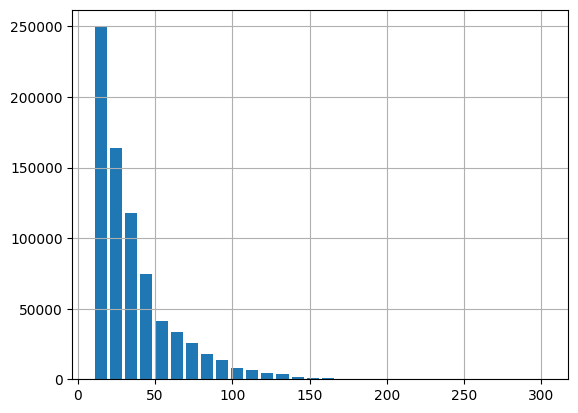

In [5]:
# histogram of the number of train rides
data["Number of train rides"].hist(bins = 30, rwidth = 0.8)

<Axes: >

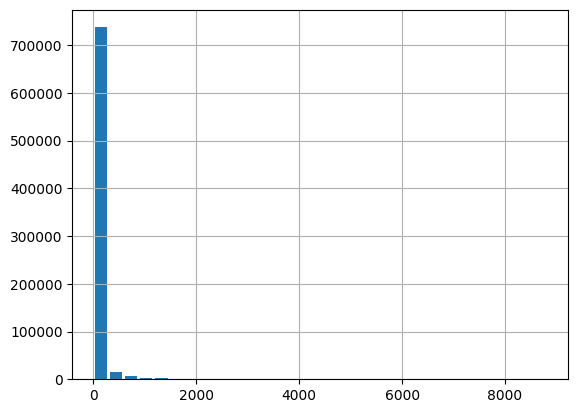

In [6]:
# histogram of the minutes of delay
data["Minutes of delay"].hist(bins = 30, rwidth = 0.8)

<Axes: xlabel='Country'>

c:\Users\Frederik\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
c:\Users\Frederik\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
c:\Users\Frederik\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Frederik\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


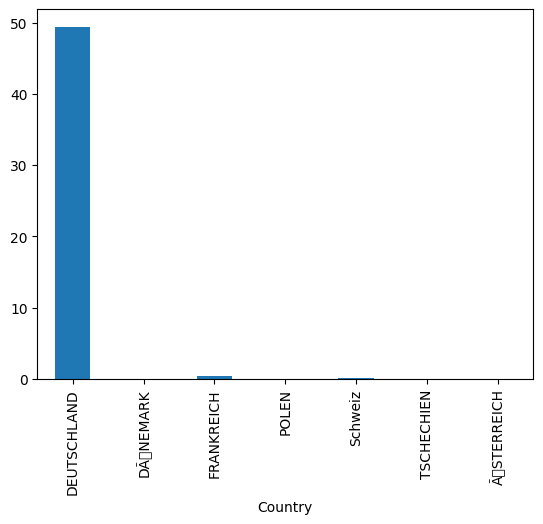

In [7]:
# histogram of the minutes of delay per country
data.groupby("Country")["Minutes of delay"].mean().plot(kind = "bar")

# Data cleaning

In [4]:
# 1) Include only values for Germany
data = data[data['Country'] == "DEUTSCHLAND"]

# check if it worked
print(len(data))
print(data['Country'].unique())

757228
['DEUTSCHLAND']


In [5]:
# 2) Missing values

# check for missing values
data.isnull().sum()

# drop rows with missing values
data = data.dropna(axis = 0, how = "any")

# check if it worked
print(len(data))
data.isnull().sum()

757007


Station or stop          0
Date                     0
Number of train rides    0
Minutes of delay         0
Name                     0
Country                  0
Coordinate Latitude      0
Coordinate Longitude     0
dtype: int64

In [6]:
# 3) Calculate mean for every station

# drop columns that are not needed
data_mean = data.drop(columns = ["Date", "Country", "Coordinate Latitude", "Coordinate Longitude", "Name"])
data_mean = data_mean.groupby(["Station or stop"]).mean()

# get the names of the stations
data_names = data.drop(columns = ["Date", "Country", "Number of train rides", "Minutes of delay"])
data_names = data_names.drop_duplicates()

# merge the two dataframes
data_mean = pd.merge(data_names, data_mean, on = "Station or stop", how = "left")

In [11]:
# check if it worked
data_mean

,Station or stop,Name,Coordinate Latitude,Coordinate Longitude,Number of train rides,Minutes of delay
0,80197079,KINDSBACH,49.420450,7.613668,30.880503,54.720126
1,80160168,NIEDERTREBRA,51.065500,11.580700,28.091228,0.691228
2,80105122,HAMM FELDMARK,51.697611,7.787870,23.058594,33.949219
3,80190793,LUDWIGSHAFEN (RHEIN) BASF,49.510682,8.428922,27.984375,0.475000
4,80231464,BURGKEMNITZ,51.689400,12.407990,12.372549,1.176471
...,...,...,...,...,...,...
3107,80101972,DORTMUND BUSCHSTRASSE,51.538476,7.395210,12.000000,0.000000
3108,80264408,SCHWAIGEN,48.665453,12.598961,10.000000,14.000000
3109,80233973,HOHENRODA,51.499080,12.421535,10.000000,0.000000
3110,80060517,DRESDEN-DOBRITZ,51.013900,13.808676,14.000000,2.000000


In [12]:
# check if it worked
print(len(data_mean))

print(len(data_mean["Name"].unique()))

print(len(data_mean["Station or stop"].unique()))

3112
3105
3112


In [7]:
# 4) drop stations with less than 10 train rides in mean
data_mean = data_mean[data_mean["Number of train rides"] >= 10]

# Descriptive statistics    

In [14]:
print("max mean delay =", max(data_mean["Minutes of delay"]))
print("min mean delay = ", min(data_mean["Minutes of delay"]))
print("mean delay = ", np.mean(data_mean["Minutes of delay"]))
print("median delay = ", np.median(data_mean["Minutes of delay"]))
print("standard deviation = ", np.std(data_mean["Minutes of delay"]))

max mean delay = 2586.009375
min mean delay =  0.0
mean delay =  34.842258656082194
median delay =  8.468309060387458
standard deviation =  102.95503472908139


<Axes: >

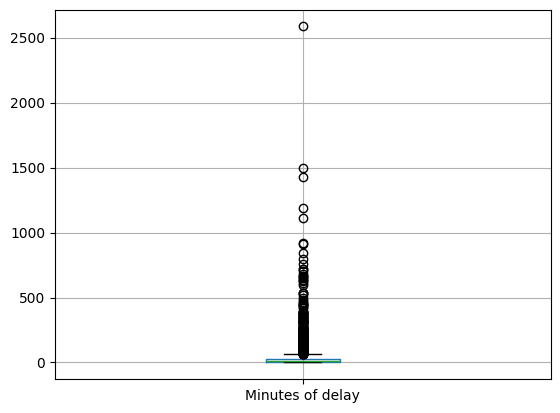

In [15]:
# create a boxplot
data_mean.boxplot(column = ["Minutes of delay"])

# data.boxplot(column = ["Minutes of delay"])

# Data visualization

In [16]:
import folium
from folium.plugins import MarkerCluster

ModuleNotFoundError: No module named 'folium'

In [47]:
# Create map
map_center = [51.1657, 10.4515]  # center of Germany
my_map = folium.Map(location = map_center, zoom_start = 6)

# add MarkerCluster for a better performance
marker_cluster = MarkerCluster().add_to(my_map)

# add markers to the map
for index, row in data_mean.iterrows():
    color = "red" if row["Minutes of delay"] > 5.59 else "green"
    folium.Marker(
        location = [row["Coordinate Latitude"], row["Coordinate Longitude"]],
        popup = f"{row['Station or stop']} - {row['Minutes of delay']} min delay",
        icon = folium.Icon(color = color),
    ).add_to(marker_cluster)

# safe map as html file
my_map.save("first_map.html")

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

/var/folders/sp/pv6m55cn0cnf_540z_5jtfgr0000gn/T/ipykernel_98296/664901238.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


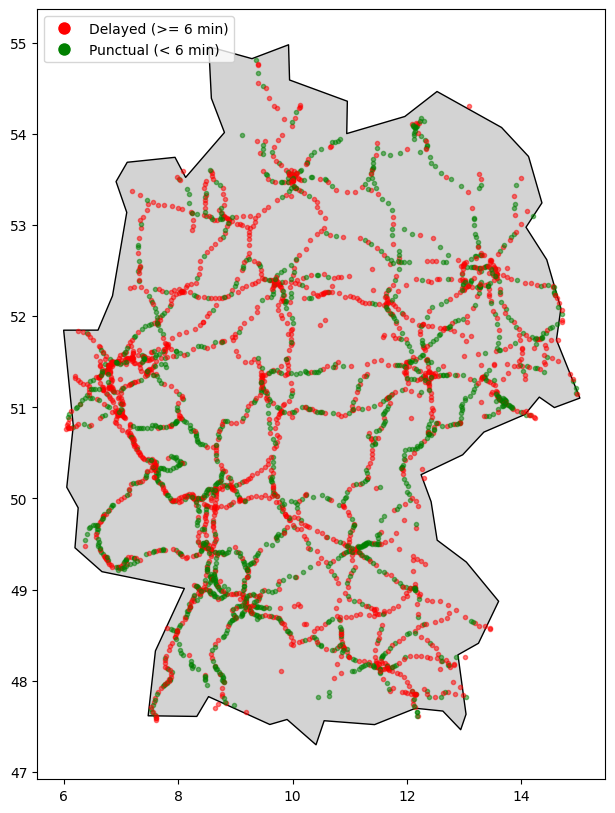

In [49]:
# Lade Deutschland-Grenzen von Natural Earth
# shp_path = "~/Desktop/QDS/1. Semester/Data Literacy/dataliteracy/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
# world = gpd.read_file(shp_path)
# germany = world[world['name'] == 'Germany']
#
# # Erstelle GeoDataFrame aus dem DataFrame
# geometry = [Point(xy) for xy in zip(data_mean['Coordinate Longitude'], data_mean['Coordinate Latitude'])]
# geo_df = gpd.GeoDataFrame(data_mean, geometry=geometry, crs=germany.crs)

#shapefile = gpd.read_file("ne_110m_admin_0_countries.shx")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany = world[world['name'] == 'Germany']

# Erstelle GeoDataFrame aus dem DataFrame
geometry = [Point(xy) for xy in zip(data_mean['Coordinate Longitude'], data_mean['Coordinate Latitude'])]
geo_df = gpd.GeoDataFrame(data_mean, geometry = geometry, crs = germany.crs)

# Plot der Deutschland-Grenzen
fig, ax = plt.subplots(figsize = (10, 10))
germany.plot(ax = ax, color = 'lightgray', edgecolor = 'black')

# Punkte für die Stationen hinzufügen
for index, row in geo_df.iterrows():
    color = 'red' if row["Minutes of delay"] > 5.59 else 'green'
    ax.plot(row["Coordinate Longitude"], row["Coordinate Latitude"], 'o', color = color, markersize = 3, alpha = 0.5)

# Legende hinzufügen
legend_labels = {'red': 'Delayed (>= 6 min)', 'green': 'Punctual (< 6 min)'}
legend_handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10, label = label)
                  for color, label in legend_labels.items()]

ax.legend(handles = legend_handles, loc = 'upper left')

# Karte anzeigen
plt.show()

# Routes...

In [19]:
# read the shp file with routes
shapefile = gpd.read_file("geo-strecke/strecken_polyline.shp")
shapefile

,mifcode,strecke_nr,richtung,laenge,von_km_i,bis_km_i,von_km_l,bis_km_l,elektrifiz,bahnnutzun,geschwindi,strecke_ku,gleisanzah,bahnart,kmspru_typ,kmspru_t00,geometry
0,xka_mrk_830,1000,0,136.0,117090058,117100094,"170,9 + 58","171,0 + 94",Oberleitung,Gz-Bahn,ab 50 bis 100 km/h,Flensburg-Weiche - Flensb. Gr,eingleisig,Hauptbahn,None,None,"LINESTRING Z (9.38321 54.74343 0.00000, 9.3834..."
1,xka_mrk_830,1000,0,3303.0,117100094,117440000,"171,0 + 94","174,4 + 0",Oberleitung,Gz-Bahn,ab 50 bis 100 km/h,Flensburg-Weiche - Flensb. Gr,zweigleisig,Hauptbahn,None,None,"LINESTRING Z (9.38390 54.74459 0.00000, 9.3840..."
2,xka_mrk_830,1000,0,172.0,117440000,117450072,"174,4 + 0","174,5 + 72",Oberleitung,Pz/Gz-Bahn,ab 50 bis 100 km/h,Flensburg-Weiche - Flensb. Gr,zweigleisig,Hauptbahn,None,None,"LINESTRING Z (9.39255 54.77023 0.00000, 9.3910..."
3,xka_mrk_830,1000,0,287.0,117450072,117480059,"174,5 + 72","174,8 + 59",Oberleitung,Pz/Gz-Bahn,ab 50 bis 100 km/h,Flensburg-Weiche - Flensb. Gr,zweigleisig,Hauptbahn,None,None,"LINESTRING Z (9.39100 54.77149 0.00000, 9.3899..."
4,xka_mrk_830,1000,0,4925.0,117480059,117970084,"174,8 + 59","179,7 + 84",Oberleitung,Pz/Gz-Bahn,ab 50 bis 100 km/h,Flensburg-Weiche - Flensb. Gr,zweigleisig,Hauptbahn,None,None,"LINESTRING Z (9.38854 54.77364 0.00000, 9.3881..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16043,xka_mrk_830,6411,2,246.0,104810000,104830046,48.1 + 0,"48,3 + 46",Oberleitung,Pz/Gz-Bahn,ab 100 bis 120 km/h,Trebnitz - Leipzig Hbf,zweigleisig,Hauptbahn,Überlängenende,None,"LINESTRING Z (12.31788 51.62657 0.00000, 12.31..."
16044,xka_mrk_830,6411,2,1786.0,104830046,105010032,"48,3 + 46","50,1 + 32",Oberleitung,Pz/Gz-Bahn,ab 100 bis 120 km/h,Trebnitz - Leipzig Hbf,zweigleisig,Hauptbahn,None,None,"LINESTRING Z (12.31746 51.62438 0.00000, 12.31..."
16045,xka_mrk_830,6411,2,2715.0,105010032,105280047,"50,1 + 32","52,8 + 47",Oberleitung,Pz/Gz-Bahn,ab 160 bis 200 km/h,Trebnitz - Leipzig Hbf,zweigleisig,Hauptbahn,None,None,"LINESTRING Z (12.31129 51.60897 0.00000, 12.31..."
16046,xka_mrk_830,6411,2,1151.0,108000095,108120046,"80,0 + 95","81,2 + 46",Oberleitung,Pz/Gz-Bahn,ab 50 bis 100 km/h,Trebnitz - Leipzig Hbf,zweigleisig,Hauptbahn,None,None,"LINESTRING Z (12.39043 51.35368 0.00000, 12.38..."


In [20]:
shapefile.groupby("strecke_ku").count()

,mifcode,strecke_nr,richtung,laenge,von_km_i,bis_km_i,von_km_l,bis_km_l,elektrifiz,bahnnutzun,geschwindi,gleisanzah,bahnart,kmspru_typ,kmspru_t00,geometry
strecke_ku,,,,,,,,,,,,,,,,
(DB-Gr.) Herzogenrath - Stw Hs,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2
(DB-Grenze) - Passau,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2
Aachen - Kassel,153,153,153,153,153,153,153,153,153,153,153,153,153,28,27,153
Aachen West - (DB-Grenze),6,6,6,6,6,6,6,6,6,6,6,6,6,2,2,6
"Aachen West, W 3 - W 301",1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwiesel - Bodenmais,11,11,11,11,11,11,11,11,11,11,11,11,11,0,0,11
Zwiesel - Grafenau,24,24,24,24,24,24,24,24,24,24,22,24,24,3,3,24
Zwotental - Klingenthal,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,5


### Difference between weekday and weekend.

In [8]:
# Turn strings in to pandas date.
data['Date'] = pd.to_datetime(data['Date'], yearfirst = True)
# Get the day of the week for each date.
data['dayofweek'] = data['Date'].dt.dayofweek
data.head()

/var/folders/sp/pv6m55cn0cnf_540z_5jtfgr0000gn/T/ipykernel_9783/2407545954.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']= pd.to_datetime(data['Date'], yearfirst = True)


,Station or stop,Date,Number of train rides,Minutes of delay,Name,Country,Coordinate Latitude,Coordinate Longitude,dayofweek
0,80197079,2016-03-16,39,49,KINDSBACH,DEUTSCHLAND,49.42045,7.613668,2
1,80197079,2016-11-10,38,74,KINDSBACH,DEUTSCHLAND,49.42045,7.613668,3
2,80197079,2016-08-29,27,33,KINDSBACH,DEUTSCHLAND,49.42045,7.613668,0
3,80197079,2016-02-25,53,85,KINDSBACH,DEUTSCHLAND,49.42045,7.613668,3
4,80197079,2016-05-28,39,38,KINDSBACH,DEUTSCHLAND,49.42045,7.613668,5


In [10]:
data_weekday = data.loc[data['dayofweek'].isin([0, 1, 2, 3, 4])]
data_weekend = data.loc[data['dayofweek'].isin([5, 6])]

<Axes: >

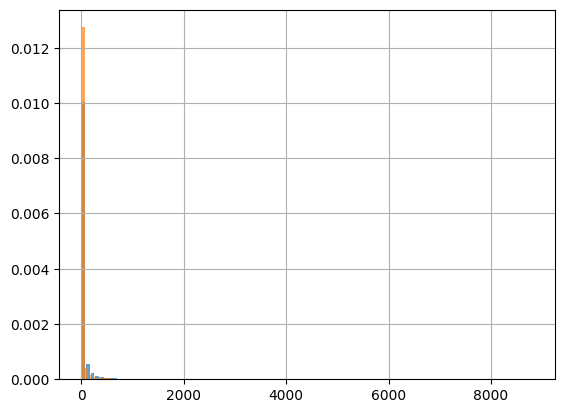

In [17]:
data_weekday["Minutes of delay"].hist(bins = 100, rwidth = 0.8, density = True, alpha = .7)
data_weekend["Minutes of delay"].hist(bins = 100, rwidth = 0.8, density = True, alpha = .7)

<Axes: >

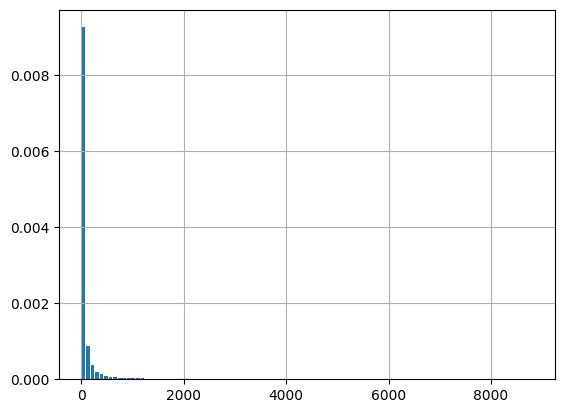

In [11]:
data_weekday[data_weekday["Minutes of delay"] != 0]["Minutes of delay"].hist(bins = 100, rwidth = 0.8, density = True)

<Axes: >

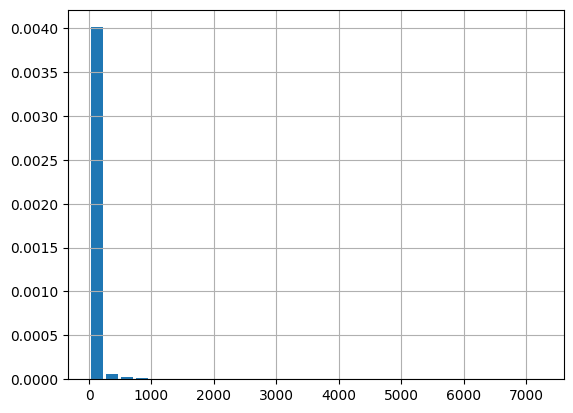

In [13]:
data_weekend["Minutes of delay"].hist(bins = 30, rwidth = 0.8, density = True)

In [26]:
data_weekday

,Station or stop,Date,Number of train rides,Minutes of delay,Name,Country,Coordinate Latitude,Coordinate Longitude,dayofweek
0,80197079,2016-03-16,39,49,KINDSBACH,DEUTSCHLAND,49.420450,7.613668,2
1,80197079,2016-11-10,38,74,KINDSBACH,DEUTSCHLAND,49.420450,7.613668,3
2,80197079,2016-08-29,27,33,KINDSBACH,DEUTSCHLAND,49.420450,7.613668,0
3,80197079,2016-02-25,53,85,KINDSBACH,DEUTSCHLAND,49.420450,7.613668,3
5,80197079,2016-08-09,32,35,KINDSBACH,DEUTSCHLAND,49.420450,7.613668,1
...,...,...,...,...,...,...,...,...,...
766023,80101972,2016-04-07,12,0,DORTMUND BUSCHSTRASSE,DEUTSCHLAND,51.538476,7.395210,3
766024,80264408,2016-08-18,10,14,SCHWAIGEN,DEUTSCHLAND,48.665453,12.598961,3
766025,80233973,2016-08-11,10,0,HOHENRODA,DEUTSCHLAND,51.499080,12.421535,3
766026,80060517,2016-09-15,14,2,DRESDEN-DOBRITZ,DEUTSCHLAND,51.013900,13.808676,3


#### Calculate mean for every station by weekday or weekend

In [27]:
data_weekday_mean = data_weekday.groupby('Station or stop')['Minutes of delay'].mean()
data_weekend_mean = data_weekend.groupby('Station or stop')['Minutes of delay'].mean()
data_by_weekday_weekend = pd.merge(data_weekday_mean, data_weekend_mean, how = "left", on = "Station or stop", suffixes = ("_weekday", "_weekend"))
data_by_weekday_weekend

,Minutes of delay_weekday,Minutes of delay_weekend
Station or stop,,
80010561,0.000000,0.000000
80010579,11.809735,6.157895
80010587,0.000000,0.000000
80010660,436.559735,192.806452
80010694,114.602881,26.587912
...,...,...
80944025,0.000000,0.000000
80944033,0.000000,0.000000
80944348,1.936170,0.500000


In [28]:
data_by_weekday_weekend.idxmax()

Minutes of delay_weekday    80031732
Minutes of delay_weekend    80031732
dtype: int64

In [29]:
diff_weekday_weekend = (data_by_weekday_weekend["Minutes of delay_weekday"] - data_by_weekday_weekend["Minutes of delay_weekend"])
diff_weekday_weekend2 = diff_weekday_weekend.drop(diff_weekday_weekend.idxmax())

<Axes: >

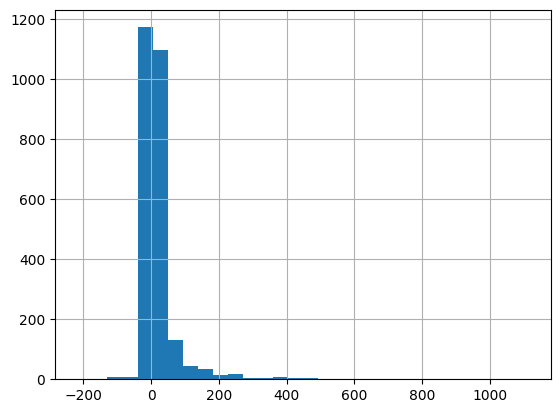

In [30]:
diff_weekday_weekend.hist(bins=30)

<Axes: >

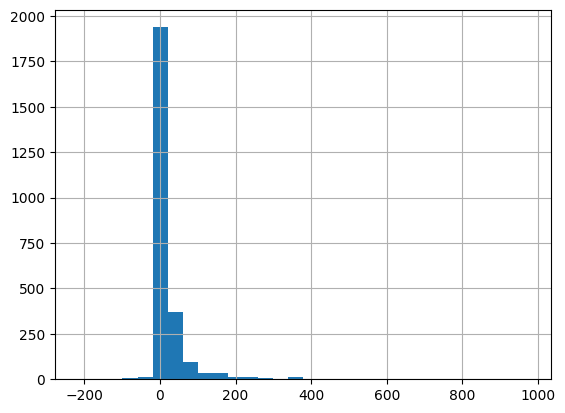

In [31]:
diff_weekday_weekend2.hist(bins=30)

In [21]:
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib import ticker
import matplotlib.pyplot as plt

TODO: Use mean over all stations of weekend / weekday

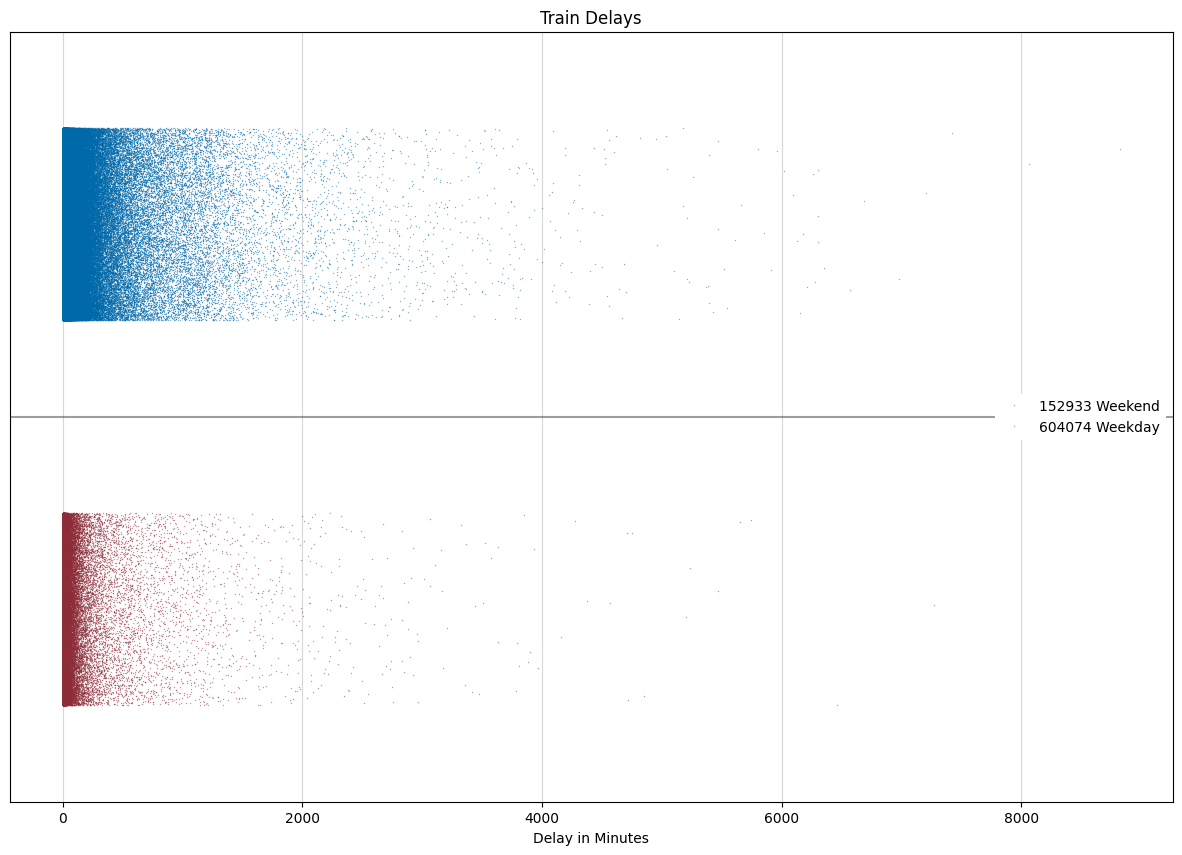

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title("Train Delays")
ax.set_xlabel("Delay in Minutes")

n_we = data_weekend.shape[0] # number of female runners
n_wd = data_weekday.shape[0] # number of male runners

np.random.seed(1)
u_we = np.random.rand(n_we)
u_wd = np.random.rand(n_wd)

ax.plot(
    data_weekend["Minutes of delay"], 0.5 * u_we, "o", label=f"{n_we} Weekend", color=rgb.tue_red, alpha=0.5, mec = "none", ms = 1
)
ax.plot(
    data_weekday["Minutes of delay"], 1 + 0.5 * u_wd, "o", label=f"{n_wd} Weekday", color=rgb.tue_blue, alpha=0.5, mec = "none", ms = 1
)


# set the x-axis formatter to the custom function
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_seconds))
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_ylim(-0.25, 1.75)

plt.show()

In [24]:
n_we = data_weekend.shape[0] # number of weekends
n_wd = data_weekday.shape[0] # number of weekdays

N = n_we + n_we # total number of days
Y = np.concatenate([data_weekend['Minutes of delay'].values, data_weekday['Minutes of delay'].values]) # all delay times, shape = (1, N)
X = np.bool_(np.concatenate([np.ones(n_we),np.zeros(n_wd)])) # TRUE if girl, FALSE otherwise, shape = (1, N)

In [29]:
rng = np.random.default_rng(1) # random number generator
B = 4000 # number of permuations to produce

# repeat Y (one row) B times, shape now = (B, N), then shuffle the columns
X_permuted = rng.permuted(np.tile(X, (B,1)), axis=1) 

In [30]:
def T_mean(group):
    '''How much faster is the average girl?'''
    return np.mean(Y[~group]) - np.mean(Y[group])

# the statistics for the original data
mean_true = T_mean(X)

# the statistics for the permuted data
mean_dist = np.apply_along_axis(T_mean, 1, X_permuted)

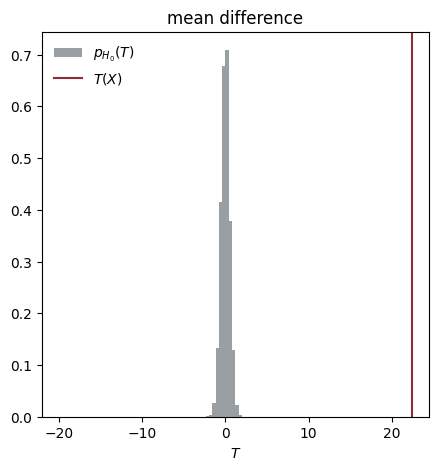

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))

bins = np.linspace(-20, 20, 101)
ax.set_title('mean difference')
ax.hist(mean_dist, bins=bins, density=True, label='$p_{H_0}(T)$', alpha=0.5, color=rgb.tue_dark)
ax.axvline(mean_true, label='$T(X)$', alpha=1.0, color=rgb.tue_red)
ax.legend(loc='upper left', frameon=False)
#ax.yaxis.set_visible(False)
ax.set_xlabel('$T$')

plt.savefig('permutation_distributions.pdf')

In [120]:
bins = np.linspace(-40, 40, 101)
loc_data = np.argmax(bins >= mean_true)
histogram,_ = np.histogram(mean_dist, bins=bins, density=True)
empirical_cdf = np.cumsum(histogram) / np.sum(histogram)

p_value = empirical_cdf[loc_data]
print(p_value)

1.0


In [69]:
data_weekday["Minutes of delay"].mean()

53.94466240891017

In [70]:
data_weekend["Minutes of delay"].mean()

31.541367788508694

In [78]:
Y = np.concatenate([data_weekend["Minutes of delay"].values, data_weekday["Minutes of delay"].values]) # all race times, shape = (1, N)
rng = np.random.default_rng(1) # random number generator
B = 100000 # number of permuations to produce

In [ ]:
fig, axs = plt.subplots(1,4)

ax = axs[0]
bins = np.linspace(-15, 15, 31)
ax.set_title('mean difference')
ax.hist(mean_dist, bins=bins, density=True, label='$p_{H_0}(T)$', alpha=0.5, color=rgb.tue_dark)
ax.axvline(mean_true, label='$T(X)$', alpha=1.0, color=rgb.tue_red)
ax.legend(loc='upper right', frameon=False)
ax.yaxis.set_visible(False)
ax.set_xlabel('$T$')